<a href="https://colab.research.google.com/github/leovaldesz/Atividades-Aprendizagem-de-m-quina/blob/master/Semana%201/heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Dados de Insuficiência Cardíaca**



*   Dataset com atributos de pacientes que tiveram insuficiência cardíaca e um atributo classificador para se eles morreram ou não.
*   `https://www.kaggle.com/andrewmvd/heart-failure-clinical-data`
*   Atributos descrevem
  *   Idade
  *   Anemia
  *   Creatinafosfoquinase
  *   Diabetes
  *   Fração de ejeção
  *   Pressão sanguínea alta
  *   Plaquetas
  *   Creatinina sérica
  *   Sódio sérico
  *   Sexo
  *   Fumante 
  *   Tempo
  *   Evento de morte






In [2]:
#Montando o ambiente no google drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


## **2. Carregando os dados na memória**

In [3]:
#importando
import pandas as pd
import numpy as np

In [4]:
#Lendo csv
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/heart_failure_clinical_records_dataset.csv')
dados.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
dados.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

## **3. Limpeza e organização dos dados**

*   Não possue atributos não numéricos no dataset.
*   Não possue colunas irrelevantes no dataset.



In [6]:
#Verificando a existência de NaN, ? ou dados faltantes e dropando a instância
dados.dropna()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## **4. Análise preliminar dos dados**

In [7]:
#Importando biblioteca de plotagem dos gráficos
import matplotlib.pyplot as plt

#### Histograma

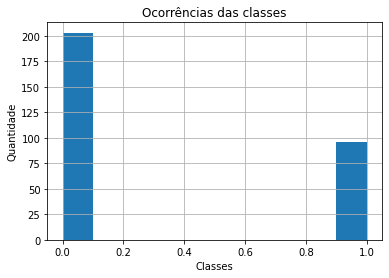

In [8]:
#Verificando as ocorrências das classes
plt.hist(dados['DEATH_EVENT'])
plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.title('Ocorrências das classes')
plt.grid(True)

Com isso podemos perceber que há muito mais dados de pessoas que sobreviveram a insuficiência cardíaca do que que morreram, é mais que o dobro de casos.

In [9]:
print('Sobreviveu: {}'.format(dados[dados['DEATH_EVENT'] == 0].shape[0]))
print('Faleceu: {}'.format(dados[dados['DEATH_EVENT'] == 1].shape[0]))

Sobreviveu: 203
Faleceu: 96


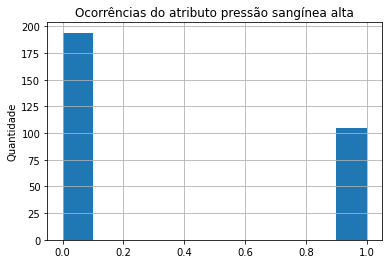

In [10]:
#Verificando a ocorrência do atributo pressão sanguínea alta
plt.hist(dados['high_blood_pressure'])
plt.ylabel('Quantidade')
plt.title('Ocorrências do atributo pressão sangínea alta')
plt.grid(True)
plt.show()

Aqui podemos ver que a maior parte dos pacientes não tinha pressão alta. Que iria ao contrário da crença popular de que do tem insuficiência cardíaca quem tem pressão alta.

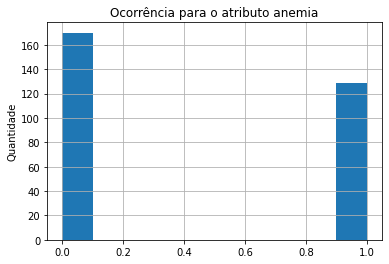

In [11]:
#Verificando as ocorrência para o atributo anemia
plt.hist(dados['anaemia'])
plt.ylabel('Quantidade')
plt.title('Ocorrência para o atributo anemia')
plt.grid(True)
plt.show()

Podemos observar que a maioria das pessoas não tem anemia. Porém nesse atributo o número de pessoas que tem não é tão discrepante.

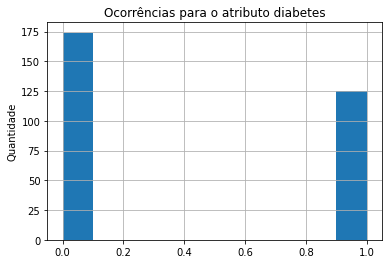

In [12]:
#Verificando as ocorrências para o atributo diabetes
plt.hist(dados['diabetes'])
plt.ylabel('Quantidade')
plt.title('Ocorrências para o atributo diabetes')
plt.grid(True)
plt.show()

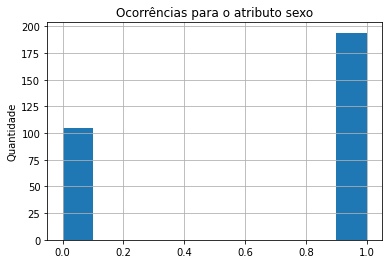

In [13]:
#Verificando as ocorrências para o atributo sexo
plt.hist(dados['sex'])
plt.ylabel('Quantidade')
plt.title('Ocorrências para o atributo sexo')
plt.grid(True)
plt.show()

A maioria das pessoas que sofreram de insuficiência cardiáca são Homens.

In [14]:
#Criando dataframe apenas com homens
homem = dados[dados['sex']==1].drop(columns=['sex']).reset_index(drop=True)
#Criando dataframe apenas com mulheres
mulher = dados[dados['sex']==0].drop(columns=['sex']).reset_index(drop=True)

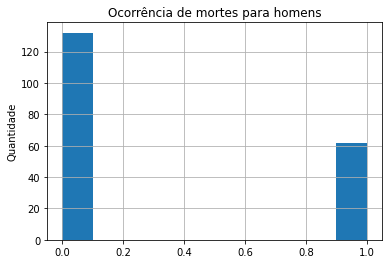

In [15]:
#Vendo as ocorrências de morte para homens
plt.hist(homem['DEATH_EVENT'])
plt.ylabel('Quantidade')
plt.title('Ocorrência de mortes para homens')
plt.grid(True)
plt.show()

In [16]:

#Quantidade
sobreviveu = homem[homem['DEATH_EVENT'] == 0].shape[0]
morreu = homem[homem['DEATH_EVENT'] == 1].shape[0]
sum = sobreviveu + morreu
porcent_sobreviveu = (sobreviveu*100)/sum
porcent_morreu = (morreu*100)/sum

print('Sobreviveu: {}. Porcentagem: {:.2f}%'.format(sobreviveu,porcent_sobreviveu))
print('Faleceu: {}. Porcentagem: {:.2f}%'.format(morreu,porcent_morreu))


Sobreviveu: 132. Porcentagem: 68.04%
Faleceu: 62. Porcentagem: 31.96%


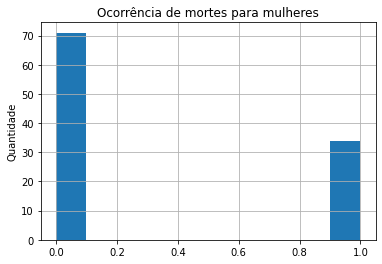

In [17]:
#Vendo as ocorrências de morte para mulheres
plt.hist(mulher['DEATH_EVENT'])
plt.ylabel('Quantidade')
plt.title('Ocorrência de mortes para mulheres')
plt.grid(True)
plt.show()

In [18]:
sobreviveu = mulher[mulher['DEATH_EVENT'] == 0].shape[0]
morreu = mulher[mulher['DEATH_EVENT'] == 1].shape[0]
sum = sobreviveu + morreu
porcent_sobreviveu = (sobreviveu * 100)/sum
porcent_morreu = (morreu*100)/sum
print('Sobreviveu: {}. Porcentagem: {:.2f}%'.format(sobreviveu, porcent_sobreviveu))
print('Morreu: {}. Porcentagem: {:.2f}%'.format(morreu, porcent_morreu))

Sobreviveu: 71. Porcentagem: 67.62%
Morreu: 34. Porcentagem: 32.38%


Homens e mulheres estão muito próximos das taxas de mortalidade.

In [19]:
#Criando tabelas para os mortos e sobreviventes
mortos = dados[dados['DEATH_EVENT'] == 1].drop(columns = ['DEATH_EVENT']).reset_index(drop = True)
sobreviventes = dados[dados['DEATH_EVENT'] == 0].drop(columns = ['DEATH_EVENT']).reset_index(drop = True)
mortos.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [20]:
sobreviventes.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12
1,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16
2,53.0,0,63,1,60,0,368000.0,0.8,135,1,0,22
3,50.0,1,159,1,30,0,302000.0,1.2,138,0,0,29
4,60.0,0,2656,1,30,0,305000.0,2.3,137,1,0,30


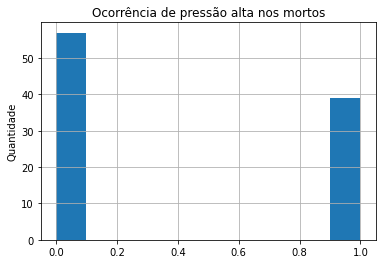

In [21]:
#Verificando ocorrência de doenças para as pessoas que morreram
plt.hist(mortos['high_blood_pressure'])
plt.ylabel('Quantidade')
plt.title('Ocorrência de pressão alta nos mortos')
plt.grid(True)
plt.show()

#### Distribuição de Probabilidade

In [22]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


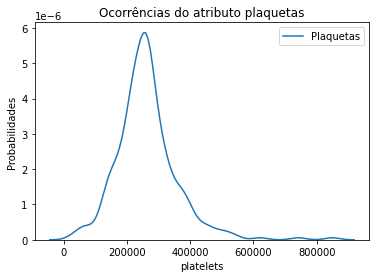

In [23]:
sns.distplot(dados.platelets, hist = False, rug = False, label = 'Plaquetas')
plt.ylabel('Probabilidades')
plt.title('Ocorrências do atributo plaquetas')
plt.show()

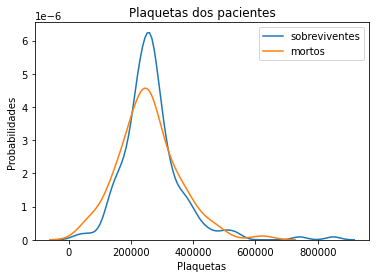

In [25]:
#Distribuição de freqência para o atributo plaquetas para os mortos e sobreviventes
sns.distplot(sobreviventes.platelets, hist=False, rug=False,label='sobreviventes')
sns.distplot(mortos.platelets, hist=False, rug=False,label='mortos')
plt.xlabel('Plaquetas')
plt.ylabel('Probabilidades')
plt.title('Plaquetas dos pacientes')
plt.show()

#### Boxplot

In [24]:
dados.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


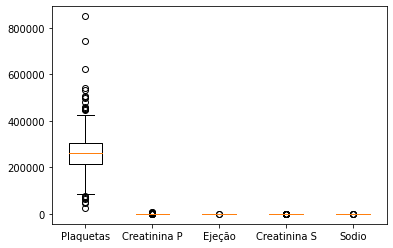

In [26]:
  #Boxplot com todos os atributos não booleanos
  plt.boxplot([dados.platelets,dados.creatinine_phosphokinase, dados.ejection_fraction,dados.serum_creatinine, dados.serum_sodium],labels = ['Plaquetas','Creatinina P','Ejeção', 'Creatinina S', 'Sodio'])
  plt.show()

## 5. Análise estatística dos dados

In [27]:
mortos.mean()

age                             65.215281
anaemia                          0.479167
creatinine_phosphokinase       670.197917
diabetes                         0.416667
ejection_fraction               33.468750
high_blood_pressure              0.406250
platelets                   256381.044792
serum_creatinine                 1.835833
serum_sodium                   135.375000
sex                              0.645833
smoking                          0.312500
time                            70.885417
dtype: float64

In [29]:
mortos.mode()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,60.0,0,582,0,25,0,263358.03,1.0,134,1,0,10


In [28]:
sobreviventes.mean()

age                             58.761906
anaemia                          0.408867
creatinine_phosphokinase       540.054187
diabetes                         0.418719
ejection_fraction               40.266010
high_blood_pressure              0.325123
platelets                   266657.489901
serum_creatinine                 1.184877
serum_sodium                   137.216749
sex                              0.650246
smoking                          0.325123
time                           158.339901
dtype: float64

In [31]:
sobreviventes.mode()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,60.0,0.0,582.0,0.0,35.0,0.0,263358.03,1.0,137.0,1.0,0.0,187
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250


In [32]:
#Amplitude do atributo idade para os mortos
'Min: ',mortos.age.min(), 'Max: ',mortos.age.max()

('Min: ', 42.0, 'Max: ', 95.0)

In [33]:
#Amplitude do atributo idade para os sobreviventes
'Min: ',sobreviventes.age.min(), 'Max: ',sobreviventes.age.max()

('Min: ', 40.0, 'Max: ', 90.0)

## 6. Estudo da Correlação

In [34]:
#Calculando a correção entre os dados e o atributo classe
for col in dados.columns[1:]:
    print(col,': ',round(dados.DEATH_EVENT.corr(dados[col]),2))

anaemia :  0.07
creatinine_phosphokinase :  0.06
diabetes :  -0.0
ejection_fraction :  -0.27
high_blood_pressure :  0.08
platelets :  -0.05
serum_creatinine :  0.29
serum_sodium :  -0.2
sex :  -0.0
smoking :  -0.01
time :  -0.53
DEATH_EVENT :  1.0


In [35]:
#correlação entre os atributos
corr = dados.corr()
corr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


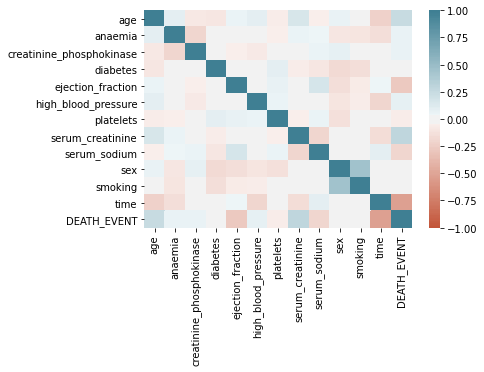

In [36]:
#Plotando gráfico de calor
sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))

## 7. Re-escala dos dados

In [37]:
dados.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


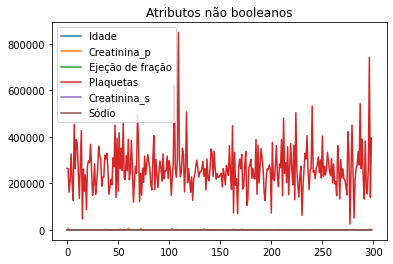

In [39]:
#plotando gráfico com os atributos não booleanos
idade = dados.age
creatinina_p = dados.creatinine_phosphokinase
ejec = dados.ejection_fraction
platelets = dados.platelets
creatinina_s = dados.serum_creatinine
sodio = dados.serum_sodium

plt.plot(idade, label='Idade')
plt.plot(creatinina_p, label = 'Creatinina_p')
plt.plot(ejec, label = 'Ejeção de fração')
plt.plot(platelets, label = 'Plaquetas')
plt.plot(creatinina_s, label = 'Creatinina_s')
plt.plot(sodio, label = 'Sódio')
plt.title('Atributos não booleanos')
plt.legend()
plt.show()

#### Re-escala pelo máximo

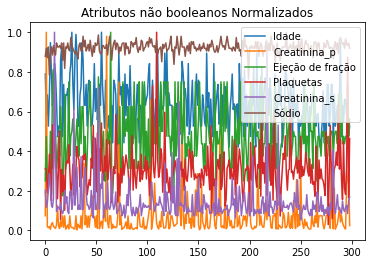

In [40]:
idade = idade/idade.max()
creatinina_p = creatinina_p/creatinina_p.max()
ejec = ejec/ejec.max()
platelets = platelets/platelets.max()
creatinina_s = creatinina_s/creatinina_s.max()
sodio = sodio/sodio.max()

plt.plot(idade, label='Idade')
plt.plot(creatinina_p, label = 'Creatinina_p')
plt.plot(ejec, label = 'Ejeção de fração')
plt.plot(platelets, label = 'Plaquetas')
plt.plot(creatinina_s, label = 'Creatinina_s')
plt.plot(sodio, label = 'Sódio')
plt.title('Atributos não booleanos Normalizados')
plt.legend()
plt.show()

#### Re-escala pelo máximo e mínimo

In [41]:
idade = dados.age
creatinina_p = dados.creatinine_phosphokinase
ejec = dados.ejection_fraction
platelets = dados.platelets
creatinina_s = dados.serum_creatinine
sodio = dados.serum_sodium

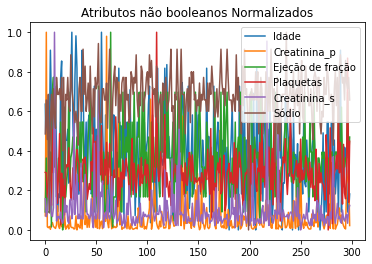

In [42]:
idade = (idade - idade.min())/(idade.max() - idade.min())
creatinina_p = (creatinina_p - creatinina_p.min())/(creatinina_p.max() - creatinina_p.min()) 
ejec = (ejec - ejec.min())/(ejec.max() - ejec.min())
platelets = (platelets - platelets.min())/(platelets.max() - platelets.min())
creatinina_s = (creatinina_s - creatinina_s.min())/(creatinina_s.max() - creatinina_s.min())
sodio = (sodio - sodio.min())/(sodio.max() - sodio.min())

plt.plot(idade, label='Idade')
plt.plot(creatinina_p, label = 'Creatinina_p')
plt.plot(ejec, label = 'Ejeção de fração')
plt.plot(platelets, label = 'Plaquetas')
plt.plot(creatinina_s, label = 'Creatinina_s')
plt.plot(sodio, label = 'Sódio')
plt.title('Atributos não booleanos Normalizados')
plt.legend()
plt.show()

#### Re-escala usando média e desvio padrão

In [43]:
idade = dados.age
creatinina_p = dados.creatinine_phosphokinase
ejec = dados.ejection_fraction
platelets = dados.platelets
creatinina_s = dados.serum_creatinine
sodio = dados.serum_sodium

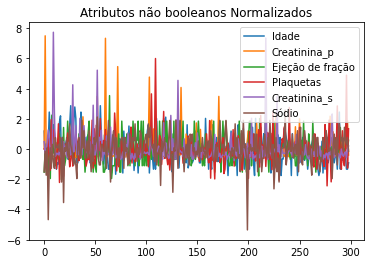

In [45]:
idade = (idade - idade.mean())/idade.std()
creatinina_p = (creatinina_p - creatinina_p.mean())/ creatinina_p.std()
ejec = (ejec - ejec.mean())/ejec.std()
platelets = (platelets - platelets.mean())/platelets.std()
creatinina_s = (creatinina_s - creatinina_s.mean())/creatinina_s.std()
sodio = (sodio - sodio.mean())/sodio.std()

plt.plot(idade, label='Idade')
plt.plot(creatinina_p, label = 'Creatinina_p')
plt.plot(ejec, label = 'Ejeção de fração')
plt.plot(platelets, label = 'Plaquetas')
plt.plot(creatinina_s, label = 'Creatinina_s')
plt.plot(sodio, label = 'Sódio')
plt.title('Atributos não booleanos Normalizados')
plt.legend()
plt.show()